<h1>Linear Regression Analysis</h1>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
coefficient of model  [[0.12443166]]
interception point [12.23572197]
y = [0.12443166]x + [12.23572197]
performance of prediction:-0.06824372649653054 


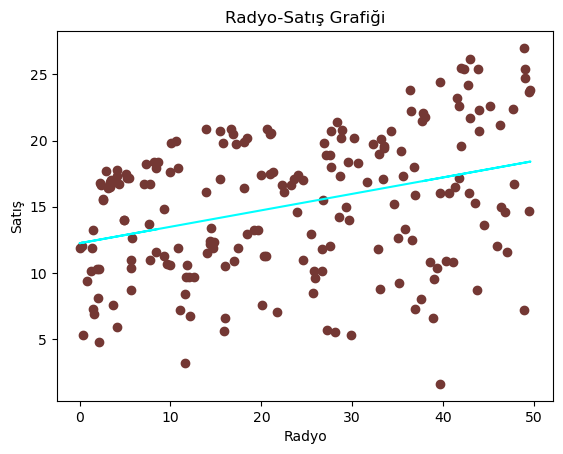

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df=pd.read_csv('advertising.csv') # kaggle'dan indirebilirsiniz.
df.head()
df.info() #ilgili bilgiler kontrol edilir.
df.describe() #istatistiksel verileri elde ediyoruz.
df.columns=['Televizyon','Radyo','Gazete','Satış']

df.isnull().sum() #boş hücre kontrolü yapılır. 
df.isnull().values.any() #başka yöntem ile boş hücre kontrolü

from sklearn import linear_model #gerekli doğrusal regresyon için kütüphane dahil edilir.

rad=df[['Radyo']]
sat=df['Satış']
lim_model=linear_model.LinearRegression()
lim_model.fit(rad.values.reshape(-1,1),sat.values.reshape(-1,1))  # modelin kurulması

print('coefficient of model ',lim_model.coef_)  #katsayı 
print('interception point',lim_model.intercept_) #kesişim noktası

print(f'y = {lim_model.coef_[0]}x + {lim_model.intercept_}') # doğru denkleminin bastırılması

pred_val=lim_model.predict(rad.values.reshape(-1,1)) #  radyo değerleri için satış tahmin değerini bize gösterir. 
print('performance of prediction:{} '.format(r2_score(rad,pred_val))) # r2 değerini kontrol ederiz ve ilişki kötüdür.



plt.scatter(rad,sat,c='#743834')
plt.xlabel('Radyo')
plt.ylabel('Satış')
plt.title('Radyo-Satış Grafiği')

plt.plot(rad,
         lim_model.intercept_ +
         lim_model.coef_[0] * rad,
         color='cyan')  #burada basit regresyon denklemi yazılır. y=mx+n (x bağımsız,y bağımlı değişkendir.)
plt.show()
